In [74]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print('The shape of training dataset : ' + str(train_data.shape))
print('The shape of testing dataset : ' + str(test_data.shape))

The shape of training dataset : (31599, 15)
The shape of testing dataset : (7900, 14)


In [75]:
good_features = train_data.dropna(axis=1).columns.tolist()
missing_features = [col for col in train_data.columns if col not in good_features]

print('Features with missing values :', missing_features)
print('Features without missing values :', good_features)

Features with missing values : ['Number_of_Windows', 'Furnishing', 'Frequency_of_Powercuts', 'Crime_Rate', 'Dust_and_Noise']
Features without missing values : ['Id', 'Property_Type', 'Property_Area', 'Number_of_Doors', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review', 'Habitability_score']


In [76]:
good_features.extend([missing_features[0]])
print(good_features)

['Id', 'Property_Type', 'Property_Area', 'Number_of_Doors', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review', 'Habitability_score', 'Number_of_Windows']


In [77]:
temp_data = train_data[good_features]
temp_data.head()

,Id,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Number_of_Windows
0,0x21e3,Apartment,106,1,No,Once in a day - Morning,5.89,90.0,3.86,71.98,NaN
1,0x68d4,Apartment,733,2,No,Once in a day - Evening,4.37,96.0,3.55,71.20,2.0
2,0x7d81,Apartment,737,2,No,Once in a day - Morning,7.45,121.0,3.81,71.39,4.0
3,0x7a57,Apartment,900,2,Yes,Once in a day - Morning,6.16,100.0,1.34,31.46,3.0
4,0x9409,Bungalow,2238,6,No,All time,5.46,116.0,4.77,93.70,14.0


In [78]:
from sklearn.preprocessing import OrdinalEncoder

temp_data = temp_data.drop(columns=['Id'])
categorical_features = ['Property_Type', 'Power_Backup'] 

ordinal_encoder = OrdinalEncoder()
temp_data[categorical_features] = ordinal_encoder.fit_transform(temp_data[categorical_features])

temp_data.head()

,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Number_of_Windows
0,1.0,106,1,1.0,Once in a day - Morning,5.89,90.0,3.86,71.98,NaN
1,1.0,733,2,1.0,Once in a day - Evening,4.37,96.0,3.55,71.20,2.0
2,1.0,737,2,1.0,Once in a day - Morning,7.45,121.0,3.81,71.39,4.0
3,1.0,900,2,2.0,Once in a day - Morning,6.16,100.0,1.34,31.46,3.0
4,2.0,2238,6,1.0,All time,5.46,116.0,4.77,93.70,14.0


In [79]:
from sklearn.preprocessing import OrdinalEncoder

# Define the desired order for the 'Water_Supply' feature
water_supply_order = ['NOT MENTIONED', 'Once in two days', 'Once in a day - Evening', 'Once in a day - Morning', 'All time']

# Create the OrdinalEncoder with the specified order for 'Water_Supply'
ordinal_encoder = OrdinalEncoder(categories=[water_supply_order])

# Encode the categorical feature 'Water_Supply'
temp_data['Water_Supply'] = ordinal_encoder.fit_transform(temp_data[['Water_Supply']])

temp_data.head()


,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Number_of_Windows
0,1.0,106,1,1.0,3.0,5.89,90.0,3.86,71.98,NaN
1,1.0,733,2,1.0,2.0,4.37,96.0,3.55,71.20,2.0
2,1.0,737,2,1.0,3.0,7.45,121.0,3.81,71.39,4.0
3,1.0,900,2,2.0,3.0,6.16,100.0,1.34,31.46,3.0
4,2.0,2238,6,1.0,4.0,5.46,116.0,4.77,93.70,14.0


In [80]:
missing_set = temp_data[temp_data.isnull().any(axis=1)]
print(missing_set.shape)

temp_data.dropna(axis=0, inplace=True)
print(temp_data.shape)

(1333, 10)
(30266, 10)


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = temp_data.drop(columns=['Number_of_Windows'])
y_train = temp_data['Number_of_Windows']

model = LinearRegression()
model.fit(X_train, y_train)

X_test = missing_set.drop(columns=['Number_of_Windows'])
predicted_values = model.predict(X_test)

print(predicted_values)

[2.38006352 2.89007577 4.3217068  ... 3.50331119 4.84803614 4.47504512]


In [82]:
missing_set['Number_of_Windows'] = predicted_values
combined_data = pd.concat([temp_data, missing_set])
combined_data.sort_index(inplace=True)

print(combined_data)

       Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0                1.0            106                1           1.0   
1                1.0            733                2           1.0   
2                1.0            737                2           1.0   
3                1.0            900                2           2.0   
4                2.0           2238                6           1.0   
...              ...            ...              ...           ...   
31594            1.0            851                1           1.0   
31595            3.0            315                1           2.0   
31596            4.0            480                3           1.0   
31597            1.0            642                2           1.0   
31598            5.0           1738                4           1.0   

       Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0               3.0                   5.89               90.0   
1               2.0          

C:\Users\ROG\AppData\Local\Temp\ipykernel_26860\1649329363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Number_of_Windows'] = predicted_values


In [83]:
temp_data = combined_data
temp_data['Furnishing'] = train_data['Furnishing']

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

furnishing_order = ['Unfurnished', 'Semi_Furnished', 'Fully Furnished']

ordinal_encoder = OrdinalEncoder(categories=[furnishing_order])
temp_data['Furnishing'] = ordinal_encoder.fit_transform(temp_data[['Furnishing']])

X_train = temp_data.drop(columns=['Furnishing'])
y_train = temp_data['Furnishing']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Furnishing'])
predicted_values = model.predict(X_test)

missing_set['Furnishing'] = predicted_values
combined_data = pd.concat([temp_data, missing_set])
combined_data.sort_index(inplace=True)

print(combined_data)

       Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0                1.0            106                1           1.0   
1                1.0            733                2           1.0   
2                1.0            737                2           1.0   
3                1.0            900                2           2.0   
4                2.0           2238                6           1.0   
...              ...            ...              ...           ...   
31594            1.0            851                1           1.0   
31595            3.0            315                1           2.0   
31596            4.0            480                3           1.0   
31597            1.0            642                2           1.0   
31598            5.0           1738                4           1.0   

       Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0               3.0                   5.89               90.0   
1               2.0          

C:\Users\ROG\AppData\Local\Temp\ipykernel_26860\3491087683.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Furnishing'] = predicted_values


In [84]:
temp_data = combined_data
temp_data['Frequency_of_Powercuts'] = train_data['Frequency_of_Powercuts']

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

X_train = temp_data.drop(columns=['Frequency_of_Powercuts'])
y_train = temp_data['Frequency_of_Powercuts']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Frequency_of_Powercuts'])
predicted_values = model.predict(X_test)

missing_set['Frequency_of_Powercuts'] = predicted_values
combined_data = pd.concat([temp_data, missing_set])
combined_data.sort_index(inplace=True)

print(combined_data)

       Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0                1.0            106                1           1.0   
1                1.0            733                2           1.0   
2                1.0            737                2           1.0   
3                1.0            900                2           2.0   
4                2.0           2238                6           1.0   
...              ...            ...              ...           ...   
31594            1.0            851                1           1.0   
31595            3.0            315                1           2.0   
31596            4.0            480                3           1.0   
31597            1.0            642                2           1.0   
31598            5.0           1738                4           1.0   

       Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0               3.0                   5.89               90.0   
1               2.0          

C:\Users\ROG\AppData\Local\Temp\ipykernel_26860\1269112938.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Frequency_of_Powercuts'] = predicted_values


In [85]:
temp_data = combined_data
temp_data['Crime_Rate'] = train_data['Crime_Rate']

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

crime_rate_order = ['Well below average', 'Slightly below average', 'Slightly above average', 'Well above average']

ordinal_encoder = OrdinalEncoder(categories=[crime_rate_order])
temp_data['Crime_Rate'] = ordinal_encoder.fit_transform(temp_data[['Crime_Rate']])

X_train = temp_data.drop(columns=['Crime_Rate'])
y_train = temp_data['Crime_Rate']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Crime_Rate'])
predicted_values = model.predict(X_test)

missing_set['Crime_Rate'] = predicted_values
combined_data = pd.concat([temp_data, missing_set])
combined_data.sort_index(inplace=True)

print(combined_data)

       Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0                1.0            106                1           1.0   
1                1.0            733                2           1.0   
2                1.0            737                2           1.0   
3                1.0            900                2           2.0   
4                2.0           2238                6           1.0   
...              ...            ...              ...           ...   
31594            1.0            851                1           1.0   
31595            3.0            315                1           2.0   
31596            4.0            480                3           1.0   
31597            1.0            642                2           1.0   
31598            5.0           1738                4           1.0   

       Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0               3.0                   5.89               90.0   
1               2.0          

C:\Users\ROG\AppData\Local\Temp\ipykernel_26860\2626881236.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Crime_Rate'] = predicted_values


In [86]:
temp_data = combined_data
temp_data['Dust_and_Noise'] = train_data['Dust_and_Noise']

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

dust_and_noise_order = ['Low', 'Medium', 'High']

ordinal_encoder = OrdinalEncoder(categories=[dust_and_noise_order])
temp_data['Dust_and_Noise'] = ordinal_encoder.fit_transform(temp_data[['Dust_and_Noise']])

X_train = temp_data.drop(columns=['Dust_and_Noise'])
y_train = temp_data['Dust_and_Noise']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Dust_and_Noise'])
predicted_values = model.predict(X_test)

missing_set['Dust_and_Noise'] = predicted_values
combined_data = pd.concat([temp_data, missing_set])
combined_data.sort_index(inplace=True)

print(combined_data)

       Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0                1.0            106                1           1.0   
1                1.0            733                2           1.0   
2                1.0            737                2           1.0   
3                1.0            900                2           2.0   
4                2.0           2238                6           1.0   
...              ...            ...              ...           ...   
31594            1.0            851                1           1.0   
31595            3.0            315                1           2.0   
31596            4.0            480                3           1.0   
31597            1.0            642                2           1.0   
31598            5.0           1738                4           1.0   

       Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0               3.0                   5.89               90.0   
1               2.0          

C:\Users\ROG\AppData\Local\Temp\ipykernel_26860\3936870242.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Dust_and_Noise'] = predicted_values


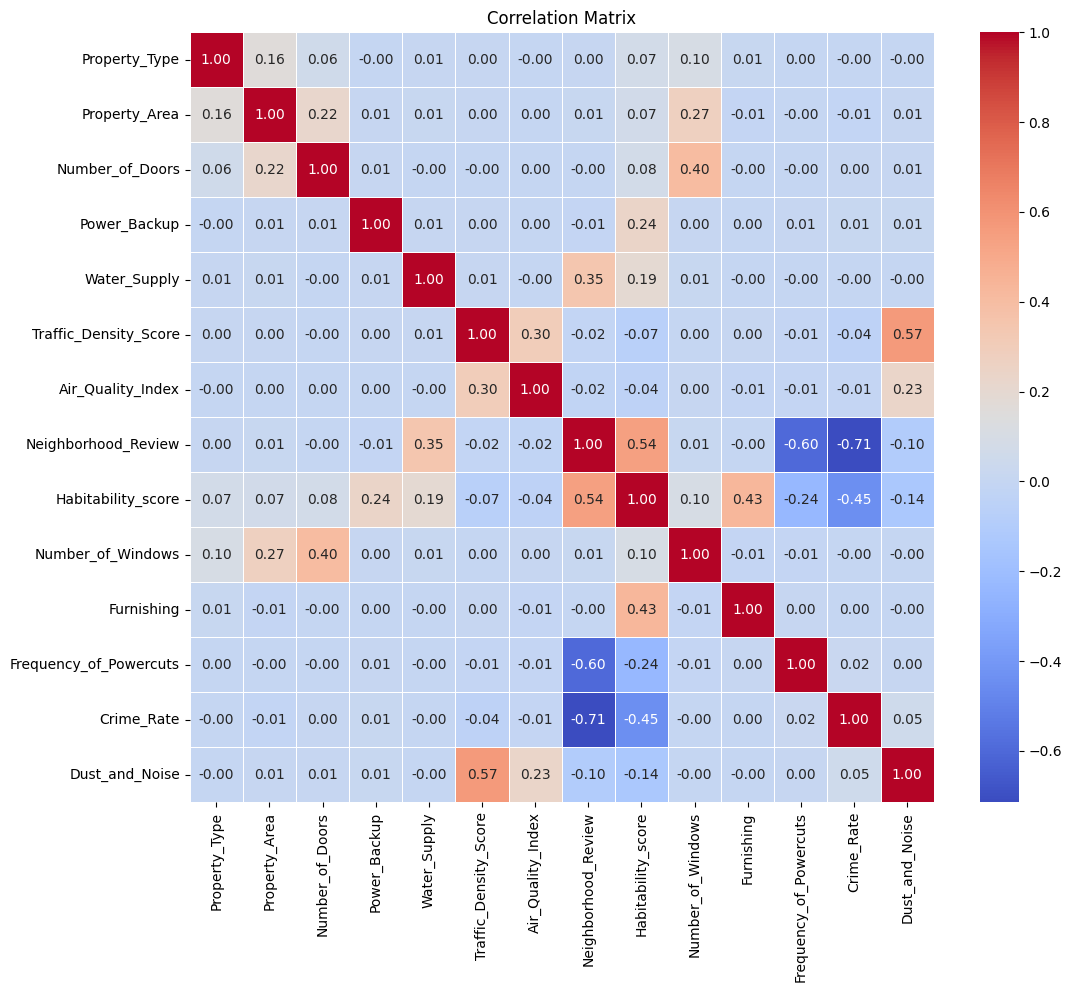

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = combined_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (Random Forest):", mse)

Root Mean Squared Error (Random Forest): 5.561881852567039


In [36]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_regressor = BaggingRegressor()
bagging_regressor.fit(X_train, y_train)
y_pred = bagging_regressor.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (Bagging Regressor):", mse)


Root Mean Squared Error (Bagging Regressor): 5.854503115381042


In [40]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaboost_regressor = XGBRegressor()
adaboost_regressor.fit(X_train, y_train)
y_pred = adaboost_regressor.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (AdaBoost Regressor):", mse)


Root Mean Squared Error (AdaBoost Regressor): 5.949670242682937


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

X = combined_data.drop(columns=['Habitability_score']) 
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=225)
xgb_model = XGBRegressor(max_depth=9, learning_rate=0.02604558902421067, n_estimators=246)
et_model = ExtraTreesRegressor(max_depth=17, min_samples_leaf=1, min_samples_split=9, n_estimators=260)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

meta_learner = LinearRegression()
meta_learner.fit(stacked_X_train, y_test)

stacked_preds = meta_learner.predict(stacked_X_train)

mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model):", mse_stacked)

Root Mean Squared Error (Stacked Model): 5.433048884247024


In [93]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',  # Root Mean Squared Error
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,  # Maximum number of leaves in one tree
    'max_depth': 10,  # No limit on the depth of trees
    'random_state': 42
}

# Train the model
num_round = 1000  # Number of boosting iterations
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions on the test set
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Evaluate the model
mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error (LightGBM):", mse)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 25279, number of used features: 13
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 73.381298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

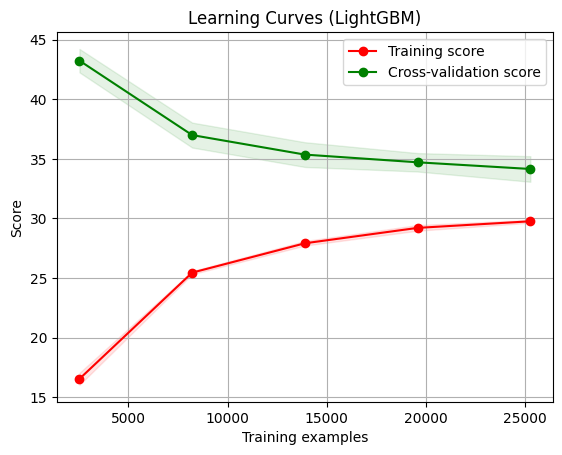

In [90]:
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

# Define the LightGBM model instance
lgb_model = lgb.LGBMRegressor()

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot the learning curve
plot_learning_curve(lgb_model, "Learning Curves (LightGBM)", X, y, cv=cv, n_jobs=-1)

plt.show()


In [94]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_trains, columns=X_train.columns)
X_tests = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_tests, columns=X_test.columns)

# Initialize the MLPRegressor with early stopping
mlp_regressor = MLPRegressor(early_stopping=True, random_state=42)

# Fit the MLPRegressor model
mlp_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_regressor.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (MLPRegressor with Early Stopping):", rmse)


Root Mean Squared Error (MLPRegressor with Early Stopping): 5.858747550198061


c:\Users\ROG\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ROG\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Test Dataset

In [118]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print('The shape of training dataset : ' + str(train_data.shape))
print('The shape of testing dataset : ' + str(test_data.shape))

The shape of training dataset : (31599, 15)
The shape of testing dataset : (7900, 14)


In [119]:
good_features = test_data.dropna(axis=1).columns.tolist()
missing_features = [col for col in test_data.columns if col not in good_features]

print('Features with missing values :', missing_features)
print('Features without missing values :', good_features)

Features with missing values : ['Number_of_Windows', 'Furnishing', 'Frequency_of_Powercuts', 'Crime_Rate', 'Dust_and_Noise']
Features without missing values : ['Id', 'Property_Type', 'Property_Area', 'Number_of_Doors', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review']


In [120]:
good_features.extend([missing_features[0]])
print(good_features)

['Id', 'Property_Type', 'Property_Area', 'Number_of_Doors', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review', 'Number_of_Windows']


In [121]:
temp_data = test_data[good_features]
temp_data.head()

,Id,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Number_of_Windows
0,0x6808,Single-family home,1521,1,No,All time,7.61,156.0,4.71,5.0
1,0x6a98,Single-family home,2233,1,No,Once in a day - Morning,5.28,82.0,4.50,2.0
2,0xacc0,Apartment,986,1,No,All time,7.72,91.0,4.79,1.0
3,0x8225,Single-family home,1625,1,No,Once in a day - Evening,6.19,159.0,4.09,2.0
4,0xaee8,Single-family home,1166,2,No,Once in a day - Evening,5.84,82.0,3.56,2.0


In [122]:
from sklearn.preprocessing import OrdinalEncoder

temp_data = temp_data.drop(columns=['Id'])
categorical_features = ['Property_Type', 'Power_Backup'] 

ordinal_encoder = OrdinalEncoder()
temp_data[categorical_features] = ordinal_encoder.fit_transform(temp_data[categorical_features])

temp_data.head()

,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Number_of_Windows
0,5.0,1521,1,1.0,All time,7.61,156.0,4.71,5.0
1,5.0,2233,1,1.0,Once in a day - Morning,5.28,82.0,4.50,2.0
2,1.0,986,1,1.0,All time,7.72,91.0,4.79,1.0
3,5.0,1625,1,1.0,Once in a day - Evening,6.19,159.0,4.09,2.0
4,5.0,1166,2,1.0,Once in a day - Evening,5.84,82.0,3.56,2.0


In [123]:
from sklearn.preprocessing import OrdinalEncoder

# Define the desired order for the 'Water_Supply' feature
water_supply_order = ['NOT MENTIONED', 'Once in two days', 'Once in a day - Evening', 'Once in a day - Morning', 'All time']

# Create the OrdinalEncoder with the specified order for 'Water_Supply'
ordinal_encoder = OrdinalEncoder(categories=[water_supply_order])

# Encode the categorical feature 'Water_Supply'
temp_data['Water_Supply'] = ordinal_encoder.fit_transform(temp_data[['Water_Supply']])

temp_data.head()


,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Number_of_Windows
0,5.0,1521,1,1.0,4.0,7.61,156.0,4.71,5.0
1,5.0,2233,1,1.0,3.0,5.28,82.0,4.50,2.0
2,1.0,986,1,1.0,4.0,7.72,91.0,4.79,1.0
3,5.0,1625,1,1.0,2.0,6.19,159.0,4.09,2.0
4,5.0,1166,2,1.0,2.0,5.84,82.0,3.56,2.0


In [124]:
missing_set = temp_data[temp_data.isnull().any(axis=1)]
print(missing_set.shape)

temp_data.dropna(axis=0, inplace=True)
print(temp_data.shape)

(321, 9)
(7579, 9)


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = temp_data.drop(columns=['Number_of_Windows'])
y_train = temp_data['Number_of_Windows']

model = LinearRegression()
model.fit(X_train, y_train)

X_test = missing_set.drop(columns=['Number_of_Windows'])
predicted_values = model.predict(X_test)

print(predicted_values)

[3.78720954 4.3261566  3.35736189 3.24226689 3.18072398 3.54273813
 4.35620811 2.60447919 4.78549215 2.67473431 2.66402134 3.71072048
 3.23693396 4.21361251 4.15515498 2.47359823 6.66197357 4.08384713
 3.90704827 3.68773212 2.87143899 4.11032057 3.14515323 5.08967721
 3.23315581 4.5693133  3.25750669 4.16584225 3.67993837 4.41859059
 3.26816184 4.42309855 3.40274445 3.97888782 4.62022413 4.57194158
 3.95248694 4.06054782 5.43256754 3.15452245 4.19648503 2.61366974
 3.3310823  3.06491293 4.27938209 4.8593881  2.70048151 6.44556889
 4.15170505 5.38532301 3.18324775 7.42363491 3.35600259 3.32178684
 2.37089393 4.46547898 5.68548724 5.43275235 4.36167391 4.03686569
 3.45328663 3.13826699 2.62120293 5.59165306 5.63536675 3.44910344
 4.68101424 4.06128217 4.41997891 5.5755901  3.20862775 4.00176448
 5.00719584 2.6491037  4.6468336  3.88081599 2.78877531 4.02314543
 3.78572284 2.50836072 3.32486815 4.08892031 6.61169368 2.45333758
 2.52535291 4.4351303  5.34539677 3.83216381 9.88661438 4.7250

In [126]:
missing_set['Number_of_Windows'] = predicted_values
combined_test = pd.concat([temp_data, missing_set])
combined_test.sort_index(inplace=True)

print(combined_test)

      Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0               5.0           1521                1           1.0   
1               5.0           2233                1           1.0   
2               1.0            986                1           1.0   
3               5.0           1625                1           1.0   
4               5.0           1166                2           1.0   
...             ...            ...              ...           ...   
7895            5.0           1120                2           1.0   
7896            1.0            445                3           1.0   
7897            2.0           3780                6           2.0   
7898            5.0           1266                1           1.0   
7899            5.0           1229                4           1.0   

      Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0              4.0                   7.61              156.0   
1              3.0                   5.28  

C:\Users\ROG\AppData\Local\Temp\ipykernel_26860\2114650630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Number_of_Windows'] = predicted_values


In [127]:
temp_data = combined_test
temp_data['Furnishing'] = train_data['Furnishing']

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

furnishing_order = ['Unfurnished', 'Semi_Furnished', 'Fully Furnished']

ordinal_encoder = OrdinalEncoder(categories=[furnishing_order])
temp_data['Furnishing'] = ordinal_encoder.fit_transform(temp_data[['Furnishing']])

X_train = temp_data.drop(columns=['Furnishing'])
y_train = temp_data['Furnishing']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Furnishing'])
predicted_values = model.predict(X_test)

missing_set['Furnishing'] = predicted_values
combined_test = pd.concat([temp_data, missing_set])
combined_test.sort_index(inplace=True)

print(combined_test)

      Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0               5.0           1521                1           1.0   
1               5.0           2233                1           1.0   
2               1.0            986                1           1.0   
3               5.0           1625                1           1.0   
4               5.0           1166                2           1.0   
...             ...            ...              ...           ...   
7895            5.0           1120                2           1.0   
7896            1.0            445                3           1.0   
7897            2.0           3780                6           2.0   
7898            5.0           1266                1           1.0   
7899            5.0           1229                4           1.0   

      Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0              4.0                   7.61              156.0   
1              3.0                   5.28  

C:\Users\ROG\AppData\Local\Temp\ipykernel_26860\2922082899.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Furnishing'] = predicted_values


In [128]:
temp_data = combined_test
temp_data['Frequency_of_Powercuts'] = test_data['Frequency_of_Powercuts']

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

X_train = temp_data.drop(columns=['Frequency_of_Powercuts'])
y_train = temp_data['Frequency_of_Powercuts']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Frequency_of_Powercuts'])
predicted_values = model.predict(X_test)

missing_set['Frequency_of_Powercuts'] = predicted_values
combined_test = pd.concat([temp_data, missing_set])
combined_test.sort_index(inplace=True)

print(combined_test)

      Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0               5.0           1521                1           1.0   
1               5.0           2233                1           1.0   
2               1.0            986                1           1.0   
3               5.0           1625                1           1.0   
4               5.0           1166                2           1.0   
...             ...            ...              ...           ...   
7895            5.0           1120                2           1.0   
7896            1.0            445                3           1.0   
7897            2.0           3780                6           2.0   
7898            5.0           1266                1           1.0   
7899            5.0           1229                4           1.0   

      Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0              4.0                   7.61              156.0   
1              3.0                   5.28  

C:\Users\ROG\AppData\Local\Temp\ipykernel_26860\4059458983.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Frequency_of_Powercuts'] = predicted_values


In [129]:
temp_data = combined_test
temp_data['Crime_Rate'] = test_data['Crime_Rate']

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

crime_rate_order = ['Well below average', 'Slightly below average', 'Slightly above average', 'Well above average']

ordinal_encoder = OrdinalEncoder(categories=[crime_rate_order])
temp_data['Crime_Rate'] = ordinal_encoder.fit_transform(temp_data[['Crime_Rate']])

X_train = temp_data.drop(columns=['Crime_Rate'])
y_train = temp_data['Crime_Rate']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Crime_Rate'])
predicted_values = model.predict(X_test)

missing_set['Crime_Rate'] = predicted_values
combined_test = pd.concat([temp_data, missing_set])
combined_test.sort_index(inplace=True)

print(combined_test)

      Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0               5.0           1521                1           1.0   
1               5.0           2233                1           1.0   
2               1.0            986                1           1.0   
3               5.0           1625                1           1.0   
4               5.0           1166                2           1.0   
...             ...            ...              ...           ...   
7895            5.0           1120                2           1.0   
7896            1.0            445                3           1.0   
7897            2.0           3780                6           2.0   
7898            5.0           1266                1           1.0   
7899            5.0           1229                4           1.0   

      Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0              4.0                   7.61              156.0   
1              3.0                   5.28  

C:\Users\ROG\AppData\Local\Temp\ipykernel_26860\3648447619.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Crime_Rate'] = predicted_values


In [130]:
temp_data = combined_test
temp_data['Dust_and_Noise'] = test_data['Dust_and_Noise']

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

dust_and_noise_order = ['Low', 'Medium', 'High']

ordinal_encoder = OrdinalEncoder(categories=[dust_and_noise_order])
temp_data['Dust_and_Noise'] = ordinal_encoder.fit_transform(temp_data[['Dust_and_Noise']])

X_train = temp_data.drop(columns=['Dust_and_Noise'])
y_train = temp_data['Dust_and_Noise']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Dust_and_Noise'])
predicted_values = model.predict(X_test)

missing_set['Dust_and_Noise'] = predicted_values
combined_test = pd.concat([temp_data, missing_set])
combined_test.sort_index(inplace=True)

print(combined_test)

      Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0               5.0           1521                1           1.0   
1               5.0           2233                1           1.0   
2               1.0            986                1           1.0   
3               5.0           1625                1           1.0   
4               5.0           1166                2           1.0   
...             ...            ...              ...           ...   
7895            5.0           1120                2           1.0   
7896            1.0            445                3           1.0   
7897            2.0           3780                6           2.0   
7898            5.0           1266                1           1.0   
7899            5.0           1229                4           1.0   

      Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0              4.0                   7.61              156.0   
1              3.0                   5.28  

C:\Users\ROG\AppData\Local\Temp\ipykernel_26860\4276439024.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Dust_and_Noise'] = predicted_values


In [131]:
combined_test.head()

,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Number_of_Windows,Furnishing,Frequency_of_Powercuts,Crime_Rate,Dust_and_Noise
0,5.0,1521,1,1.0,4.0,7.61,156.0,4.71,5.0,1.0,0.0,0.0,1.0
1,5.0,2233,1,1.0,3.0,5.28,82.0,4.50,2.0,0.0,0.0,0.0,1.0
2,1.0,986,1,1.0,4.0,7.72,91.0,4.79,1.0,2.0,0.0,0.0,1.0
3,5.0,1625,1,1.0,2.0,6.19,159.0,4.09,2.0,0.0,0.0,0.0,1.0
4,5.0,1166,2,1.0,2.0,5.84,82.0,3.56,2.0,2.0,0.0,1.0,1.0


In [110]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',  # Root Mean Squared Error
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,  # Maximum number of leaves in one tree
    'max_depth': 10,  # No limit on the depth of trees
    'random_state': 42
}

# Train the model
num_round = 1000  # Number of boosting iterations
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions on the test set
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Evaluate the model
mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error (LightGBM):", mse)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 25279, number of used features: 13
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 73.381298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [111]:
test_data = pd.read_csv("test.csv")

final_test_preds = lgb_model.predict(combined_test, num_iteration=lgb_model.best_iteration)

predictions_df = pd.DataFrame({'Id': test_data['Id'], 'Habitability_score': final_test_preds})

predictions_df.to_csv("predicted_test12.csv", index=False)

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

X = combined_data.drop(columns=['Habitability_score']) 
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=225)
xgb_model = XGBRegressor(max_depth=9, learning_rate=0.02604558902421067, n_estimators=246)
et_model = ExtraTreesRegressor(max_depth=17, min_samples_leaf=1, min_samples_split=9, n_estimators=260)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

meta_learner = LinearRegression()
meta_learner.fit(stacked_X_train, y_test)

stacked_preds = meta_learner.predict(stacked_X_train)

mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model):", mse_stacked)

Root Mean Squared Error (Stacked Model): 5.436228933291061


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

X = combined_data.drop(columns=['Habitability_score']) 
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300)
xgb_model = XGBRegressor(max_depth=7, learning_rate=0.1, n_estimators=100)
et_model = ExtraTreesRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

meta_learner = LinearRegression()
meta_learner.fit(stacked_X_train, y_test)

stacked_preds = meta_learner.predict(stacked_X_train)

mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model):", mse_stacked)

Root Mean Squared Error (Stacked Model): 5.423546261369571


In [133]:
import pandas as pd

# Assuming test_data contains the test dataset without the 'Id' column
test_data = combined_test
test1 = pd.read_csv("test.csv")

# Make predictions on the test data using base models
rf_preds = rf_model.predict(test_data)
xgb_preds = xgb_model.predict(test_data)
et_preds = et_model.predict(test_data)

# Create stacked dataset
stacked_test_data = np.column_stack((rf_preds, xgb_preds, et_preds))

# Make predictions on the stacked test data using meta-learner
stacked_preds = meta_learner.predict(stacked_test_data)

# Add the predictions to the test_data DataFrame
test_data['Habitability_score'] = stacked_preds

test_data.head()

# Create a new DataFrame with 'Id' and 'Habitability_score' columns
predictions_df = pd.DataFrame({'Id': test1['Id'], 'Habitability_score': test_data['Habitability_score']})

# Write the predictions to a new CSV file
predictions_df.to_csv("predicted_test15.csv", index=False)

In [134]:
combined_test.head()

,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Number_of_Windows,Furnishing,Frequency_of_Powercuts,Crime_Rate,Dust_and_Noise,Habitability_score
0,5.0,1521,1,1.0,4.0,7.61,156.0,4.71,5.0,1.0,0.0,0.0,1.0,74.512373
1,5.0,2233,1,1.0,3.0,5.28,82.0,4.50,2.0,0.0,0.0,0.0,1.0,74.333520
2,1.0,986,1,1.0,4.0,7.72,91.0,4.79,1.0,2.0,0.0,0.0,1.0,85.975136
3,5.0,1625,1,1.0,2.0,6.19,159.0,4.09,2.0,0.0,0.0,0.0,1.0,69.364153
4,5.0,1166,2,1.0,2.0,5.84,82.0,3.56,2.0,2.0,0.0,1.0,1.0,72.935266
